In [1]:
# from google.colab import drive
# drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [2]:
# %cd /gdrive/MyDrive/Lambdatest

/gdrive/MyDrive/Lambdatest


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
import os
from scipy import io,signal
import numpy as np
import pandas as pd
import pickle
import sys
import copy
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
train_data = pd.read_csv("train_data.csv") 
test_data = pd.read_csv("test_data.csv") 
dataset_desc = pd.read_csv("train_data_dictionary.csv")

In [5]:
dataset_desc

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [6]:
train_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [7]:
test_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [8]:
print(train_data.shape, test_data.shape)

(318438, 18) (137057, 17)


Correlation Heatmap
    

                                    case_id  ...  Admission_Deposit
case_id                            1.000000  ...          -0.045972
Hospital_code                     -0.043023  ...           0.045446
City_Code_Hospital                -0.011352  ...          -0.034455
Available Extra Rooms in Hospital  0.042580  ...          -0.143739
Bed Grade                          0.013702  ...           0.073833
patientid                         -0.004150  ...          -0.000877
City_Code_Patient                  0.065196  ...           0.025837
Visitors with Patient              0.001309  ...          -0.150358
Admission_Deposit                 -0.045972  ...           1.000000

[9 rows x 9 columns]


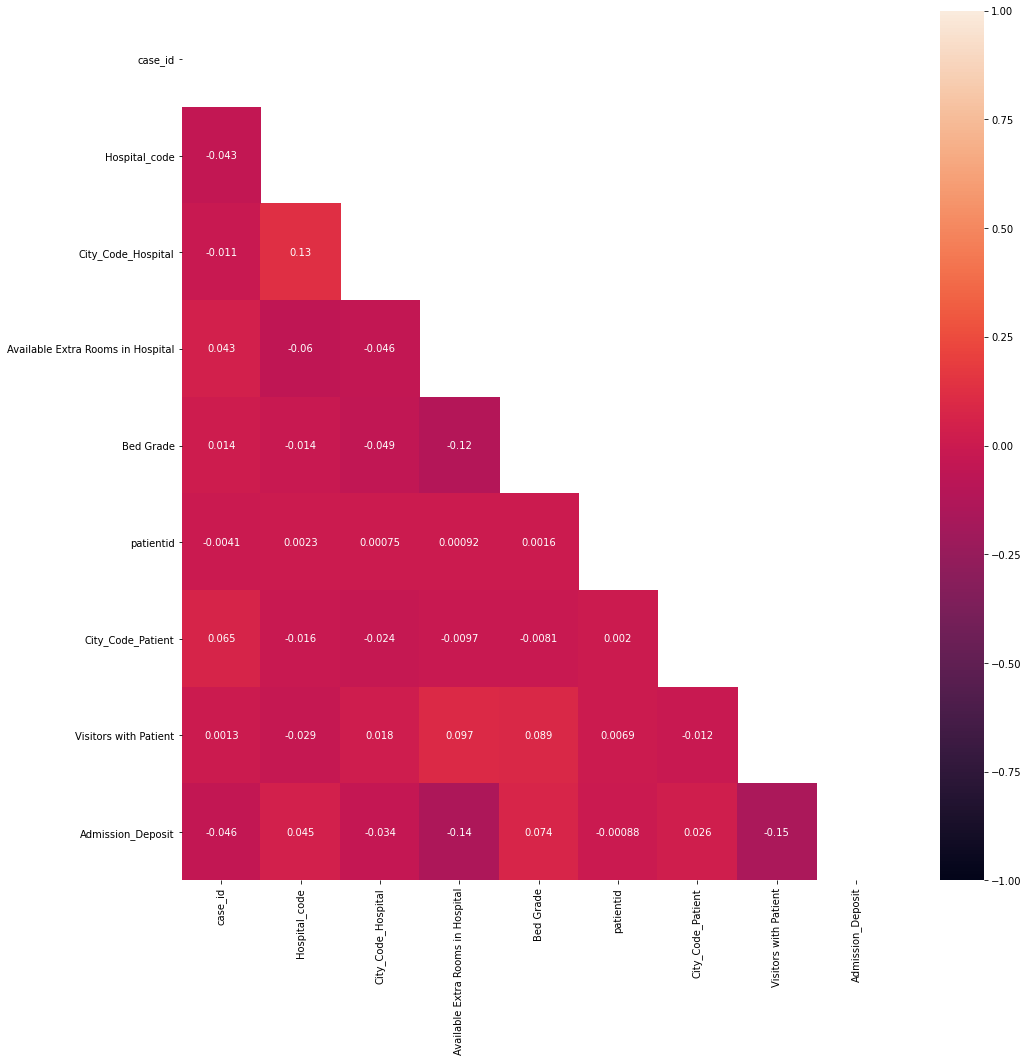

In [9]:
corr = train_data.corr()
print(corr)
plt.figure(figsize=(16, 16))
mask = np.triu(np.ones(corr.shape)).astype(np.bool)
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True)

In [10]:
train_data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


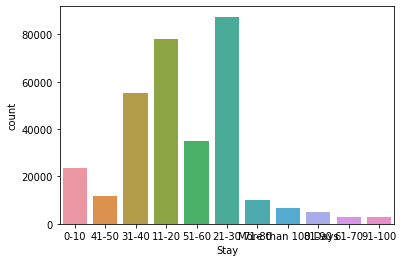

In [11]:
print(train_data['Stay'].value_counts())
print(sns.countplot(train_data['Stay']))

The Stay class is clearly imbalanced and hence resampling using SMOTE needs to be done

In [12]:
for c in train_data.columns:
    print("Count Distribution for Column {}\n".format(c))
    print(train_data[c].value_counts())

Count Distribution for Column case_id

2047      1
107105    1
31322     1
29275     1
19036     1
         ..
21920     1
23969     1
17826     1
19875     1
2049      1
Name: case_id, Length: 318438, dtype: int64
Count Distribution for Column Hospital_code

26    33076
23    26566
19    21219
6     20425
11    17328
14    17328
28    17137
27    14244
9     11510
29    11311
12    11297
32    10703
25     9834
10     9435
15     9257
21     8150
24     7992
3      7116
17     5501
5      5261
1      5249
13     5236
2      5102
30     5002
22     4277
31     3967
16     3671
8      3663
18     3630
20     1405
7      1306
4      1240
Name: Hospital_code, dtype: int64
Count Distribution for Column Hospital_type_code

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64
Count Distribution for Column City_Code_Hospital

1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4  

## Feature Engineering and beginning the ML Pipeline

In [13]:
# We will concat both train and test data set
train_data['is_train'] = 1
test_data['is_train'] = 0

#df_Frames = [df_Train,df_Test]
total_data = pd.concat([train_data, test_data])

Removing Null Values in Training Dataset

In [14]:
print(total_data.isnull().sum())

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
is_train                                  0
dtype: int64


In [15]:
total_data['Bed Grade'] = total_data['Bed Grade'].fillna(total_data['Bed Grade'].mean())
total_data['City_Code_Patient'] = total_data['City_Code_Patient'].fillna(method = 'ffill')
print()
print(total_data.isnull().sum())


case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                                 0
patientid                                 0
City_Code_Patient                         0
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
is_train                                  0
dtype: int64


Label Encoding 

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

total_data['Hospital_code'] = le.fit_transform(total_data['Hospital_code'])
total_data['Hospital_type_code'] = le.fit_transform(total_data['Hospital_type_code'])
# total_data['City_Code_Hospital'] = le.fit_transform(total_data['City_Code_Hospital'])
total_data['Hospital_region_code'] = le.fit_transform(total_data['Hospital_region_code'])
# total_data['Available Extra Rooms in Hospital'] = le.fit_transform(total_data['Available Extra Rooms in Hospital'])
total_data['Department'] = le.fit_transform(total_data['Department'])
total_data['Ward_Type'] = le.fit_transform(total_data['Ward_Type'])
total_data['Ward_Facility_Code'] = le.fit_transform(total_data['Ward_Facility_Code'])
total_data['Bed Grade'] = le.fit_transform(total_data['Bed Grade'])
#total_data['patientid'] = le.fit_transform(total_data['patientid'])
total_data['City_Code_Patient'] = le.fit_transform(total_data['City_Code_Patient'])
total_data['Type of Admission'] = le.fit_transform(total_data['Type of Admission'])
total_data['Severity of Illness'] = le.fit_transform(total_data['Severity of Illness'])
total_data['Visitors with Patient'] = le.fit_transform(total_data['Visitors with Patient'])
total_data['Age'] = le.fit_transform(total_data['Age'])

We need to encode columns : 

*   Hospital_type_code  
*   Hospital_region_code  
*   Department  
*   Ward_Facility_Code     
*   Bed Grade                          
*   Type of Admission 
*   Severity of Illness 
*   Age 
*   Stay



Unmerge the total_data

In [18]:
train_data_final = total_data[total_data['is_train'] == 1]
test_data_final = total_data[total_data['is_train'] == 0]

# Model Evaluation

In [19]:
X = train_data_final
X = X.drop(['case_id','is_train', 'Stay'], axis=1)

y = train_data_final['Stay']

X_pred = test_data_final
X_pred = X_pred.drop(['case_id','is_train', 'Stay'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20)

## LGBMClassifier

In [21]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import lightgbm as lgb
lgb_cl = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.1, n_estimators=500, importance_type='gain', objective='multiclass', num_boost_round=100,
                            num_leaves=300, max_depth=5, 
                            max_bin=60, bagging_faction=0.9, feature_fraction=0.9, subsample_freq=2, scale_pos_weight=2.5, 
                            random_state=1994, n_jobs=-1, silent=False)

lgb_cl.fit(X_train, np.ravel(y_train))
y_pred = lgb_cl.predict(X_valid)
print("Validation accuracy of the model: ", metrics.accuracy_score(y_valid, y_pred))
# cv_scores = cross_val_score(lgb_cl, X, y, cv=5)
# print("Mean Cross Validated accuracy of the model: ",np.mean(cv_scores))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Validation accuracy of the model:  0.4200948373319935


## Random Forest Classifier

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(n_estimators = 200)
# print(rfc.fit(X_train, np.ravel(y_train)))
# y_pred = rfc.predict(X_valid)
# print("Validation accuracy of the model: ", metrics.accuracy_score(y_valid, y_pred))
# cv_scores = cross_val_score(rfc, X, y, cv=5)
# print("Mean Cross Validated accuracy of the model: ",np.mean(cv_scores))

## Submission

In [23]:
y_pred = lgb_cl.predict(X_pred)
submission_df = pd.DataFrame({'case_id':test_data_final['case_id'], 'Stay':y_pred})
submission_df.to_csv('submission.csv', index=False)